# CLASSIFY RESTAURANT REVIEWS
## *Using Natural Language Processing (NLP)*

**Problem Statement:** A restaurant receives written feedback from customers. The aim is to develop a model that can classify the review text into positive/negative feedback.

<img src="restaurant_review.jpg">

### Steps to prepare the text for a  "Bag of Words" model

1. Split to words (Tokenizing)
2. Convert to lower case
3. Remove the stop words
4. Remove punctuation
5. Remove HTML tags (if present)

In [1]:
# importing key liberaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import text processing liberaries
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

# Liberaries to create word cloud
from wordcloud import WordCloud
from PIL import Image

# Model training & assessment
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report


In [2]:
# import data file (tab separated file)
data = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3 )

In [3]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


# Creating a "Word Cloud"
### just a fun way to visualise repetitive words :)

In [4]:
# convert positive and negative verbatim into strings
pos_verbatim = ''
for i in data[data['Liked']==1]['Review']:
    pos_verbatim = pos_verbatim + ' ' + i

neg_verbatim = ''
for i in data[data['Liked']==0]['Review']:
    neg_verbatim = neg_verbatim + ' ' + i

In [5]:
def mask_prep(mask_path):
    icon = Image.open(mask_path)
    image_mask = Image.new(mode='RGB', size = icon.size, color =(255, 255, 255))
    image_mask.paste(icon, box=icon)
    return np.array(image_mask) # converts the image object to an array

In [6]:
def form_cloud(text_string, Mask , FontPath):
    
    # defining cloud charectristics
    word_cloud = WordCloud(mask=Mask, background_color='white', max_font_size= 300,
                          max_words=400, colormap='ocean', font_path = FontPath)

    word_cloud.generate(text_string.upper())

    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

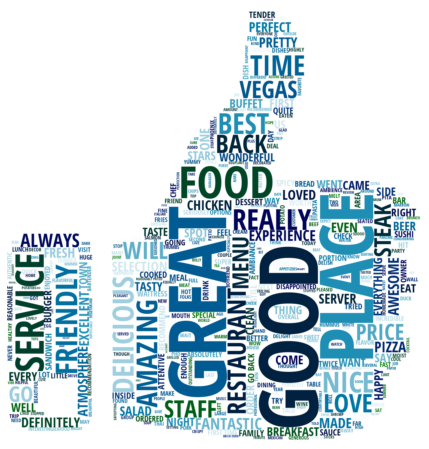

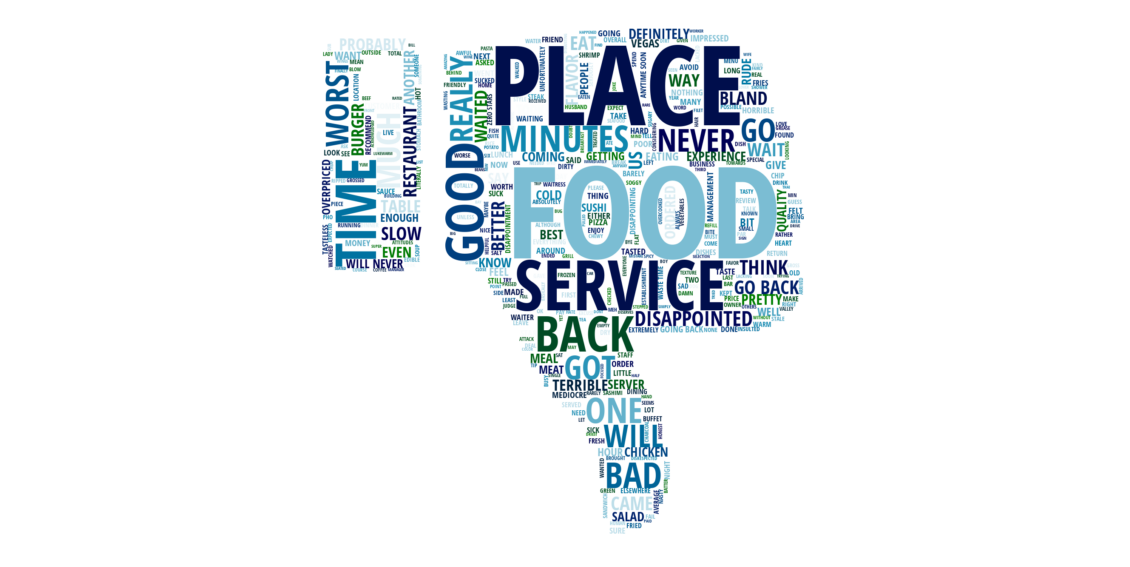

In [7]:
# plot 2 word clouds for positive and negative reviews
plt.figure(figsize=(8,8))
form_cloud(pos_verbatim, mask_prep('thumbs-up.png'),'OpenSansCondensed-Bold.ttf')

plt.figure(figsize=(20,20))
form_cloud(neg_verbatim, mask_prep('thumbs-down.png'),'OpenSansCondensed-Bold.ttf')

## Data cleaning and modeling

In [8]:
# cleaning the text

corpus = []
for i in range(0, 1000):
    
    # keep only the letters (and spaces)
    review = re.sub('[^a-zA-Z]',' ', data['Review'][i] )

    # convert all text to lower case
    review = review.lower()

    # split review words
    review = review.split()

    # remove all stopwords and stem words
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english')) ]

    # restore the list to string
    review = ' '.join(review)
    
    corpus.append(review)

### Creating the bag of words model
To reduce the number of features, I removed all words  with less than 3 repetitions. It actually improved the model performance.

In [9]:
cv = CountVectorizer(min_df = 3)

In [10]:
# Split data into training & testing sets
X = cv.fit_transform(corpus).toarray()
y = data.iloc[: , 1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 0)

In [11]:
# train Naive Bayes model
nbclas = GaussianNB()
nbclas.fit(X_train, y_train)
y_pred = nbclas.predict(X_test)

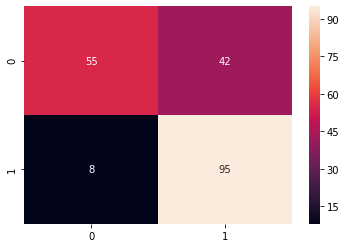

              precision    recall  f1-score   support

           0       0.87      0.57      0.69        97
           1       0.69      0.92      0.79       103

    accuracy                           0.75       200
   macro avg       0.78      0.74      0.74       200
weighted avg       0.78      0.75      0.74       200



In [12]:
# Assess model performance

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot= True)
plt.show()

# Print a summary classification report
print(classification_report(y_test, y_pred))

**Comments:** The Naive Bayes model succeeded to classify the reviews with an accuracy of 75%